In [1]:
import pandas as pd
import numpy as np
from pandas import json_normalize
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
from scipy.stats import norm
from sklearn import preprocessing

In [60]:
df = pd.read_csv (r'tracks_file.csv',sep='\t')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13672 entries, 0 to 13671
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   album                1534 non-null   object 
 1   artwork_url          11641 non-null  object 
 2   caption              671 non-null    object 
 3   comment_count        13243 non-null  float64
 4   commentable          13672 non-null  bool   
 5   comments             9140 non-null   object 
 6   created_at           13672 non-null  object 
 7   description          8455 non-null   object 
 8   display_date         13672 non-null  object 
 9   download_count       13372 non-null  float64
 10  downloadable         13672 non-null  bool   
 11  duration             13672 non-null  int64  
 12  embeddable_by        13672 non-null  object 
 13  full_duration        13672 non-null  int64  
 14  genre                10217 non-null  object 
 15  has_downloads_left   13672 non-null 

In [11]:
df['duration'].value_counts()

30000     820
192026     12
208039      9
216033      7
196937      7
         ... 
199941      1
307019      1
393953      1
444212      1
205315      1
Name: duration, Length: 10780, dtype: int64

In [13]:
df['genre'].value_counts()

Pop              311
Country          291
Hip-hop & Rap    264
Dance & EDM      260
Electronic       239
                ... 
tech trance        1
TEXCORE            1
Foliage            1
Rain Sound         1
imagineDragon      1
Name: genre, Length: 2210, dtype: int64

In [15]:
subsetDataFrame = df[df['genre'].isin(['Pop','Country','Hip-hop & Rap','Dance & EDM','Electronic'])]
subsetDataFrame

,album,artwork_url,caption,comment_count,commentable,comments,created_at,description,display_date,download_count,...,streamable,tag_list,title,track_authorization,track_format,uri,urn,user,user_id,waveform_url
15,NaN,https://i1.sndcdn.com/artworks-ObstznpU25CNSNn...,NaN,10.0,True,"958889185,339504867,1001743396,891186760,98567...",2021-04-15T22:00:08Z,Sech - Wao (Official Audio) Listen to it: http...,2021-04-15T22:00:08Z,0.0,...,True,"Sech ,stuffed animal ,panama ,sech music ,When...",Sech - Wao (Audio Oficial),eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1030389865,soundcloud:tracks:1030389865,966249775,966249775,https://wave.sndcdn.com/9TBgFazc1XJH_m.json
19,NaN,https://i1.sndcdn.com/artworks-j6guL20A8kZJlDQ...,Zedd - Live @ EDC Las Vegas 2021,1.0,True,910192351,2021-11-02T02:40:22Z,Zedd - Live @ EDC Las Vegas 2021,2021-11-02T02:40:22Z,0.0,...,True,Zedd - Live @ EDC Las Vegas 2021 edm dance Ele...,Zedd - Live @ EDC Las Vegas 2021,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1152221320,soundcloud:tracks:1152221320,1015539532,1015539532,https://wave.sndcdn.com/wCJX5Q9kwOmO_m.json
52,NaN,https://i1.sndcdn.com/artworks-vp3QmqK7aD8c-0-...,NaN,2118.0,True,"1038088576,737890048,249569792,153199228,10375...",2021-09-28T21:01:05Z,NaN,2021-09-24T00:00:00Z,0.0,...,True,NaN,"NEIKED, Mae Muller, Polo G - Better Days",eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1132658965,soundcloud:tracks:1132658965,166394682,166394682,https://wave.sndcdn.com/xbi4J0pA3ztm_m.json
61,1338782305,https://i1.sndcdn.com/artworks-SorYZ588wkhsVRH...,NaN,93.0,True,"55657345,146652930,92676353,161952650,10750990...",2021-10-28T12:57:04Z,Dr. Ozi - Pull The Pin\nHive Mind EP Pt. 1\nNe...,2021-10-28T12:57:04Z,0.0,...,True,NaN,[EDM IDentity Premiere] Pull The Pin,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1149468976,soundcloud:tracks:1149468976,2688819,2688819,https://wave.sndcdn.com/GAehxrduPyvL_m.json
62,NaN,https://i1.sndcdn.com/artworks-vrvA1z7YpLelMv7...,NaN,26.0,True,"131345160,166132234,1418508,29058192,7980308,1...",2021-11-05T21:00:08Z,Subscribe to our channel: https://lnk.to/YTA_B...,2021-11-05T21:00:08Z,0.0,...,True,"Trance Progressive "" Progressive House"" ""Above...",Group Therapy 459 with Above & Beyond and São ...,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/1154646322,soundcloud:tracks:1154646322,124286,124286,https://wave.sndcdn.com/pJOyLWGYxjj0_m.json
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,NaN,https://i1.sndcdn.com/artworks-j3x8w4g67HqFDg6...,NaN,0.0,True,NaN,2020-12-20T14:58:26Z,Comment j'ai fait la toune? https://youtu.be/P...,2020-12-20T18:33:21Z,0.0,...,True,remix trap,Every imagine dragon song basically (louisp re...,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/951156535,soundcloud:tracks:951156535,100800051,100800051,https://wave.sndcdn.com/0yeNI6zY2KDI_m.json
13622,NaN,NaN,NaN,2.0,True,25929013,2016-03-15T17:52:37Z,NaN,2016-03-15T17:52:37Z,0.0,...,True,Imagine Dragon Radioactive Cover,Imagine Dragon - Radioactive (Cover Ft Dominika),eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/252022671,soundcloud:tracks:252022671,117584042,117584042,https://wave.sndcdn.com/qhf4ugsoGD03_m.json
13633,NaN,NaN,NaN,0.0,True,NaN,2014-10-02T10:06:25Z,NaN,2014-10-02T10:06:25Z,100.0,...,True,soundcloud:source=web-record,Radioactive - Imagine Dragon ( cover by me ),eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,single-track,https://api.soundcloud.com/tracks/170301347,soundcloud:tracks:170301347,115470113,115470113,https://wave.sndcdn.com/uTOTYzunUD6a_m.json
13658,NaN,NaN,NaN,37.0,True,"890946820,1003344517,606956934,890271370,90660...",2020-07-10T08:2

/tmp/ipykernel_5952/1730426016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetDataFrame['created_at'] = pd.to_datetime(subsetDataFrame['created_at']) # convert string data to datetime object


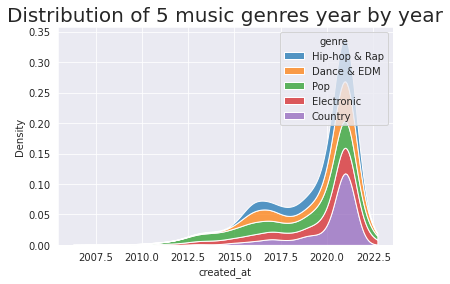

In [16]:
subsetDataFrame['created_at'] = pd.to_datetime(subsetDataFrame['created_at']) # convert string data to datetime object
ax = sns.kdeplot(data=subsetDataFrame, x=subsetDataFrame['created_at'].dt.year, hue="genre", multiple="stack")
ax.set_title("Distribution of 5 music genres year by year",size = 20);

In [17]:
subsetDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 15 to 13669
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   album                178 non-null    object             
 1   artwork_url          1285 non-null   object             
 2   caption              119 non-null    object             
 3   comment_count        1355 non-null   float64            
 4   commentable          1365 non-null   bool               
 5   comments             1084 non-null   object             
 6   created_at           1365 non-null   datetime64[ns, UTC]
 7   description          893 non-null    object             
 8   display_date         1365 non-null   object             
 9   download_count       1358 non-null   float64            
 10  downloadable         1365 non-null   bool               
 11  duration             1365 non-null   int64              
 12  embeddable_by     

In [53]:
df['likes_count'].isnull().values.sum()

300

In [61]:
# Plot the jointplot
sns.set_style('darkgrid');

# copy the data
df_z_scaled = df.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    

p = sns.jointplot(x='duration',y='likes_count',data=df_z_scaled,kind='kde')

# JointGrid has a convenience function
p.set_axis_labels('Duration', 'Likes count', fontsize=16)
#p.ax_marg_x.set_xlim(0, 10000000)
#p.ax_marg_y.set_ylim(0, 1000000)
# Set title for plot
p.fig.suptitle( "How does duration affect the likes count?" , size = 24 )
  
# Display figure
plt.tight_layout()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [2]:
df = pd.read_csv (r'users_file.csv',sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avatar_url                    3075 non-null   object 
 1   city                          1391 non-null   object 
 2   comments_count                3075 non-null   int64  
 3   country_code                  1298 non-null   object 
 4   created_at                    3075 non-null   object 
 5   description                   1156 non-null   object 
 6   first_name                    1989 non-null   object 
 7   followers                     2352 non-null   object 
 8   followers_count               3075 non-null   int64  
 9   followings                    2164 non-null   object 
 10  followings_count              3075 non-null   int64  
 11  full_name                     1992 non-null   object 
 12  groups_count                  3075 non-null   int64  
 13  id 

Text(0.5, 1.0, 'Distribution of Followers count')

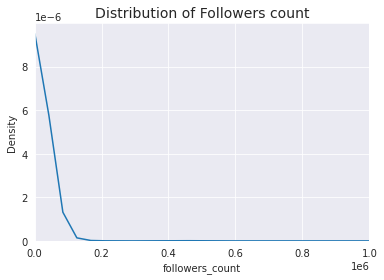

In [17]:
#ax = sns.displot(x=df.followers_count)
##ax.set(xlim=(0, 80)) # adjust this value
#sns.set(style="darkgrid")
#plt.ticklabel_format(style='plain', axis='x')
#plt.xlabel('Followers count', fontsize=16)
#plt.ylabel('Frequency', fontsize=16)
#plt.title('Distplot showing distribution of Followers count')
#plt.show()
#plt.clf()

#sns.set_style('darkgrid');
#sns.distplot(df.followers_count)
#
#plt.xlim(0,1000000)
## Set title for plot

## Display figure
#plt.tight_layout()

sns.kdeplot(data= df,x='followers_count')
plt.xlim(0,1000000)
plt.title( "Distribution of Followers count" , size = 14 ) 

/home/uyen_trang/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


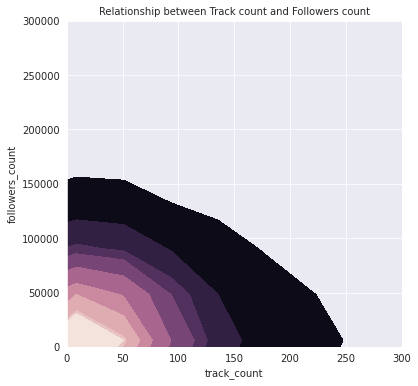

In [20]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.track_count, df.followers_count, cmap=cmap, n_levels=10, shade=True);

ax.set(xlim=(0, 300))
ax.set(ylim=(0, 300000))
#ax = sns.kdeplot(data=df,x = 'track_count',y = 'followers_count')
ax.set_title("Relationship between Track count and Followers count",size = 10);
#plt.show()
#

In [3]:
df = pd.read_csv (r'playlists_file.csv',sep='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artwork_url       2691 non-null   object 
 1   created_at        7013 non-null   object 
 2   description       1610 non-null   object 
 3   display_date      7013 non-null   object 
 4   duration          7013 non-null   int64  
 5   embeddable_by     7013 non-null   object 
 6   genre             2768 non-null   object 
 7   id                7013 non-null   int64  
 8   is_album          7013 non-null   bool   
 9   kind              7013 non-null   object 
 10  label_name        482 non-null    object 
 11  last_modified     7013 non-null   object 
 12  license           7013 non-null   object 
 13  likers            3610 non-null   object 
 14  likes_count       7013 non-null   int64  
 15  managed_by_feeds  7013 non-null   bool   
 16  permalink         7013 non-null   object 


In [5]:
df_corr = df[['duration','likes_count','reposts_count','track_count']]

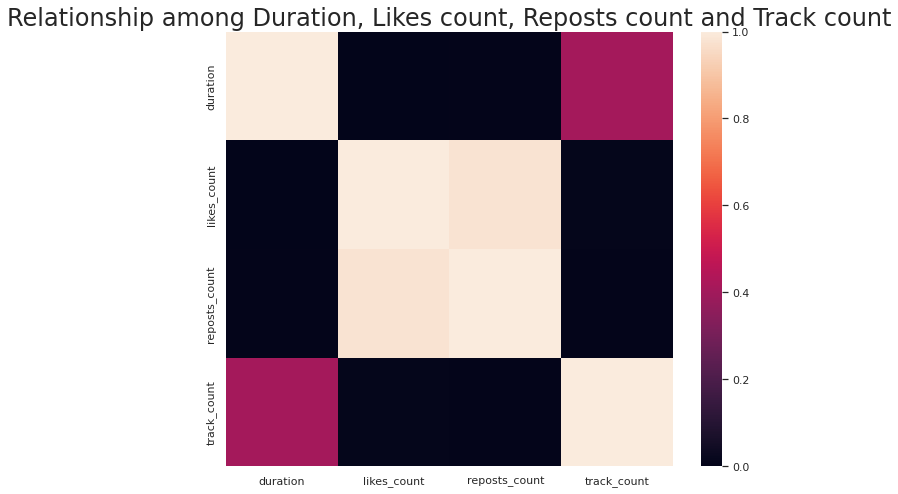

In [11]:
sns.heatmap(df_corr.corr())
sns.set(rc={'figure.figsize':(8,10)})
plt.title("Relationship among Duration, Likes count, Reposts count and Track count",size = 24)
plt.show()

<AxesSubplot:xlabel='duration', ylabel='Density'>

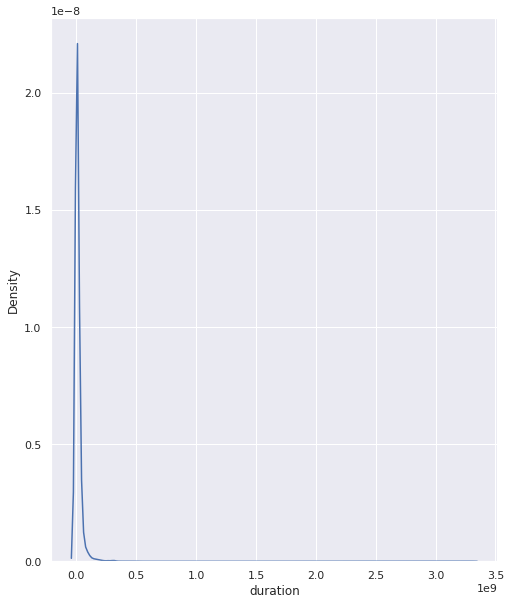

In [13]:
sns.kdeplot(data=df_corr,x= 'duration')